In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('framingham_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

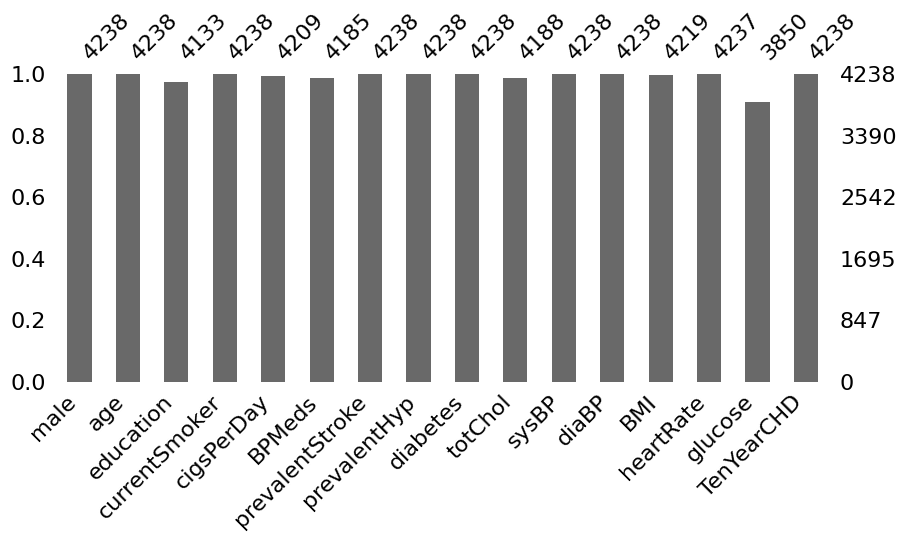

In [4]:
msno.bar(df, figsize = (10, 4))

In [5]:
print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


##### Tratando dados NaN das colunas cigsPerDay e education

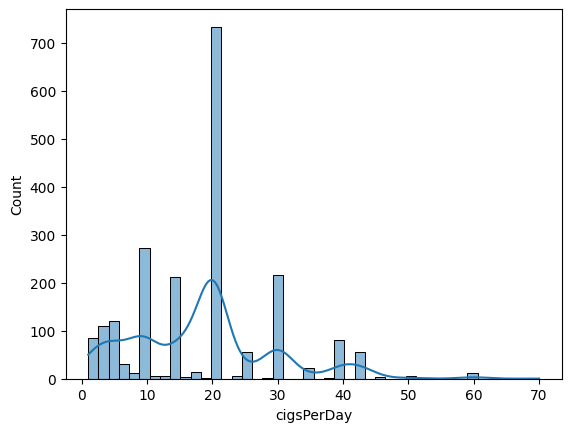

In [6]:
df_smoker = df[(df['currentSmoker'] == 1)]
sns.histplot(df_smoker, x = 'cigsPerDay', kde = True);

In [7]:
# print(df[(df['cigsPerDay'] == 0) & (df['BPMeds'] == 1)])
df_cigsperday_nan = df[(df['cigsPerDay'].isna())]
print(df_cigsperday_nan['currentSmoker'].unique()) # Os dados NaN na colunas cigsPerDay é referente somente a fumantes.

[1]


In [8]:
df = df.dropna(subset = ['cigsPerDay', 'education']).reset_index(drop = True) # Mais indicado o dropna por ser um pequeno grupo de dados NaN
df.shape

(4106, 16)

##### Tratando dados NaN das colunas totChol e BMI

In [9]:
df.corr() # total de colesterol (totChol) e índice de massa corporal (BMI) possuem poucos dados, não possui relevancia no modelo e não possuem corr com nenhuma outra variável preditora para tentar tratar os dados NaN.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027448,0.016209,0.200370,0.322086,-0.052398,-0.004262,0.006325,0.017836,-0.071493,-0.034107,0.059133,0.080487,-0.116457,0.004578,0.084565
age,-0.027448,1.000000,-0.165723,-0.212968,-0.192461,0.126140,0.058788,0.309358,0.101308,0.268451,0.394907,0.208745,0.136072,-0.010695,0.121065,0.229005
education,0.016209,-0.165723,1.000000,0.018272,0.008085,-0.010786,-0.035195,-0.082299,-0.038745,-0.023416,-0.130609,-0.063425,-0.137630,-0.054759,-0.035327,-0.054866
currentSmoker,0.200370,-0.212968,0.018272,1.000000,0.770367,-0.048021,-0.033109,-0.105824,-0.040231,-0.048701,-0.131359,-0.110482,-0.163361,0.056606,-0.057257,0.018074
cigsPerDay,0.322086,-0.192461,0.008085,0.770367,1.000000,-0.046214,-0.033281,-0.069527,-0.034928,-0.026092,-0.090378,-0.056606,-0.089780,0.071794,-0.057635,0.054110
BPMeds,-0.052398,0.126140,-0.010786,-0.048021,-0.046214,1.000000,0.118734,0.261630,0.044883,0.084908,0.256598,0.195680,0.101453,0.017837,0.053093,0.091486
prevalentStroke,-0.004262,0.058788,-0.035195,-0.033109,-0.033281,0.118734,1.000000,0.075801,0.007000,0.000280,0.057782,0.046014,0.026726,-0.018119,0.018804,0.062608
prevalentHyp,0.006325,0.309358,-0.082299,-0.105824,-0.069527,0.261630,0.075801,1.000000,0.076211,0.166664,0.696395,0.616141,0.300570,0.150176,0.089051,0.179955
diabetes,0.017836,0.101308,-0.038745,-0.040231,-0.034928,0.044883,0.007000,0.076211,1.000000,0.041253,0.110238,0.049755,0.083458,0.046799,0.617550,0.097576
totChol,-0.071493,0.268451,-0.023416,-0.048701,-0.026092,0.084908,0.000280,0.166664,0.041253,1.000000,0.212360,0.169521,0.117466,0.087541,0.049409,0.085020


In [10]:
df = df.dropna(subset = ['totChol', 'BMI']).reset_index(drop = True)
df ### 400 linhas a mais que no modelo_v1, um aumento de ~10% na dataset.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4036,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4037,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4038,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


##### Tratando dados NaN da coluna BPMeds

In [11]:
df_bpmeds = df[(df['BPMeds'].isna())]
df_bpmeds.shape

(52, 16)

In [12]:
print(df[(df['prevalentHyp'] == 0) & (df['BPMeds'] == 1)])

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [13]:
for index in df[(df['BPMeds'].isna()) & (df['prevalentHyp'] == 0)].index:
    df.at[df.index[index], 'BPMeds'] = 0
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4036,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4037,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4038,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [14]:
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 1)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 1) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 0)]).shape)
print((df[(df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0) & (df['BPMeds'] == 1)]).shape)
# Não foi encontrado regras, e é um tiro no escuro tenta definir entre sim ou não, e muito arriscado, e como são poucos dados NaN (22), não pesa no modelo então podemos excluir

(39, 16)
(262, 16)
(856, 16)
(78, 16)


In [15]:
df = df.dropna(subset = ['BPMeds']).reset_index(drop = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4014,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4015,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4016,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


##### Tratando dados NaN da coluna heartRate

In [16]:
df_heartRate = df[(df['heartRate'].isna())]
df_heartRate

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
659,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [17]:
media_heartRate = df[(df['TenYearCHD'] == 1) & (df['male'] == 1) & (df['currentSmoker'] == 1) & (df['prevalentStroke'] == 0) & (df['prevalentHyp'] == 1) & (df['diabetes'] == 0)]
media_heartRate = (media_heartRate['heartRate'].mean()).round(1)
media_heartRate

np.float64(80.3)

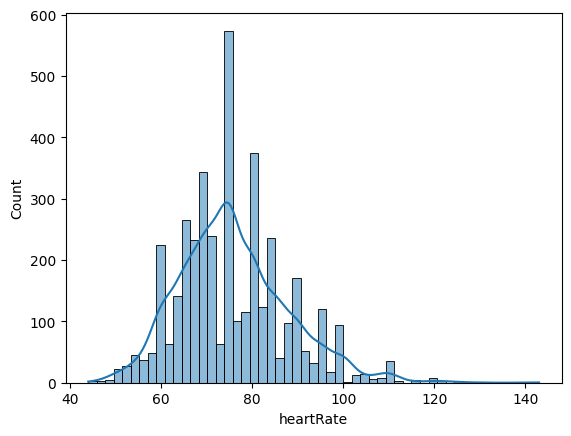

In [18]:
sns.histplot(df, x = 'heartRate', kde = True);

In [19]:
df.at[df.index[659], 'heartRate'] =  media_heartRate
df[df.index == 659]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
659,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,80.3,91.0,1


##### Tratando dados NaN da coluna glucose

In [20]:
df_glucose = df[(df['glucose'].isna())]
df_glucose.shape

(332, 16)

(565, 16) (35, 16) (3351, 16) (67, 16)


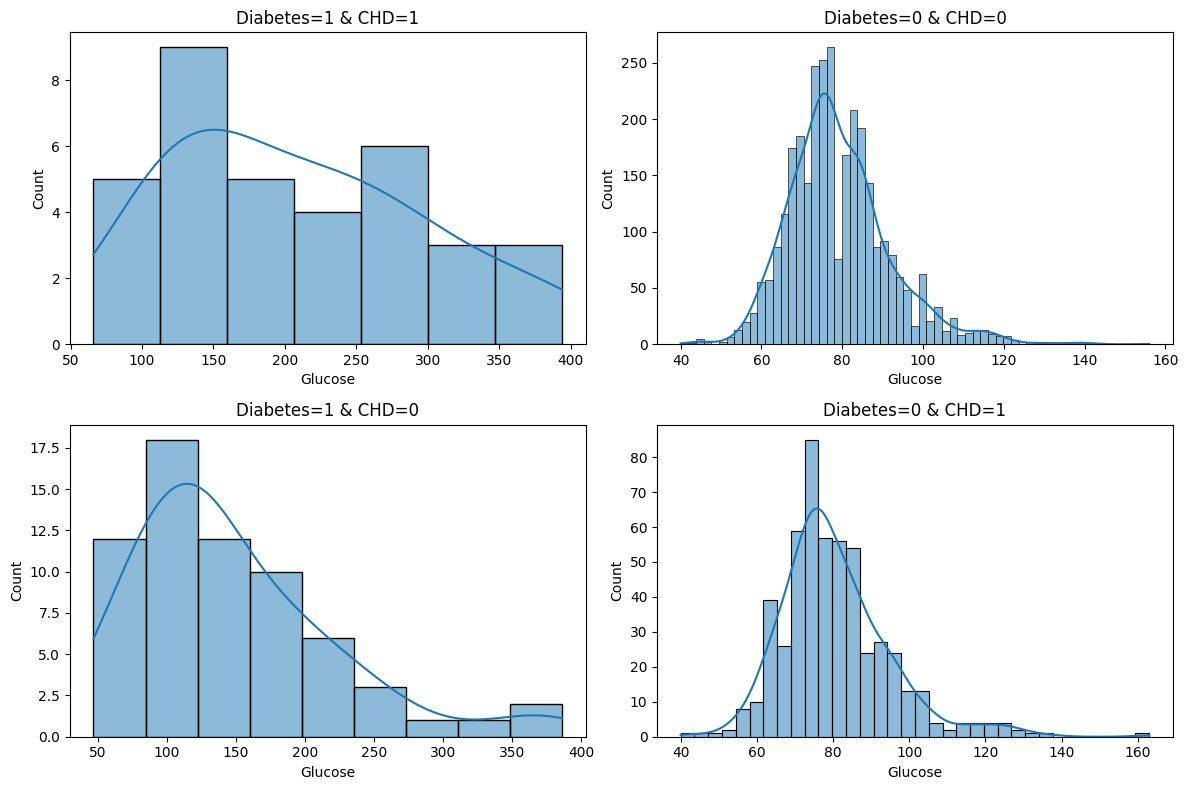

In [21]:
media_diabete1_chd1 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 1)]
media_diabete0_chd0 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 0)]
media_diabete1_chd0 = df[(df['diabetes'] == 1) & (df['TenYearCHD'] == 0)]
media_diabete0_chd1 = df[(df['diabetes'] == 0) & (df['TenYearCHD'] == 1)]
print(media_diabete0_chd1.shape, media_diabete1_chd1.shape, media_diabete0_chd0.shape, media_diabete1_chd0.shape)

dfs_media = [
    media_diabete1_chd1,
    media_diabete0_chd0,
    media_diabete1_chd0,
    media_diabete0_chd1
]
titles = [
    'Diabetes=1 & CHD=1',
    'Diabetes=0 & CHD=0',
    'Diabetes=1 & CHD=0',
    'Diabetes=0 & CHD=1'
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (df_media, title) in enumerate(zip(dfs_media, titles)):
    sns.histplot(df_media['glucose'], ax = axes[i], kde = True)
    axes[i].set_title(title)
    axes[i].set_xlabel('Glucose')

plt.tight_layout()
plt.show()

In [22]:
media_diabete1_chd1 = (media_diabete1_chd1['glucose'].median()).round(1)
media_diabete0_chd0 = (media_diabete0_chd0['glucose'].mean()).round(1)
media_diabete1_chd0 = (media_diabete1_chd0['glucose'].median()).round(1)
media_diabete0_chd1 = (media_diabete0_chd1['glucose'].mean()).round(1)

print(media_diabete1_chd1, media_diabete0_chd0, media_diabete1_chd0, media_diabete0_chd1)

for i in df[df['glucose'].isna()].index:
    diabete = df.at[df.index[i], 'diabetes']
    chd = df.at[df.index[i], 'TenYearCHD']

    if diabete == 1 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete1_chd1
    elif diabete == 1 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 0:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd0
    elif diabete == 0 and chd == 1:
        df.at[df.index[i], 'glucose'] =  media_diabete0_chd1

206.0 79.2 126.0 80.6


In [23]:
print(df.isna().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


##### Rodando o Modelo

In [24]:
var_target = 'TenYearCHD'
x = df.drop(columns = [f'{var_target}'])#.to_numpy()
y = df[f'{var_target}']#.to_numpy()

In [25]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(3214, 15) (804, 15) (3214,) (804,)


In [26]:
clf = LogisticRegression(max_iter=2000)
clf.fit(x_treino, y_treino)

LogisticRegression(max_iter=2000)

In [27]:
coef = pd.DataFrame(clf.coef_[0], index = x.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.497656
age,0.065069
education,-0.028209
currentSmoker,0.037350
cigsPerDay,0.020801
BPMeds,0.004852
prevalentStroke,0.395281
prevalentHyp,0.177714
diabetes,-0.035024
totChol,0.001701


In [28]:
score_treinamento = clf.score(x_treino, y_treino)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.8565650280024891 0.8594527363184079


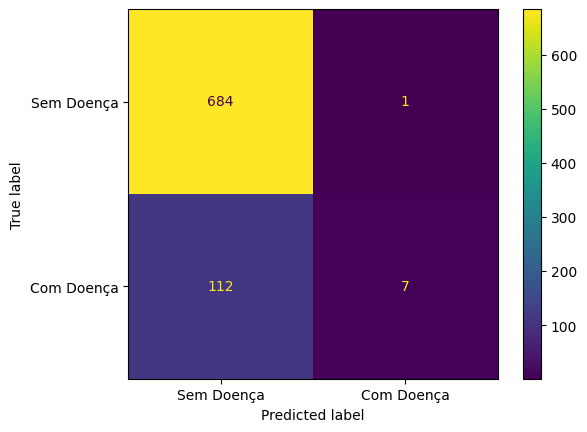

In [29]:
y_pred = clf.predict(x_teste)
cm = metrics.confusion_matrix(y_teste, y_pred)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

# Falso Positivo (FP): 2
# Falso Negativo (FN): 116
# Verdadeiro Positivo (VP): 3
# Verdadeiro Negativo (VN): 683

In [30]:
recall = metrics.recall_score(y_teste, y_pred)
f1_score = metrics.f1_score(y_teste, y_pred)
print(recall, f1_score)

0.058823529411764705 0.11023622047244094


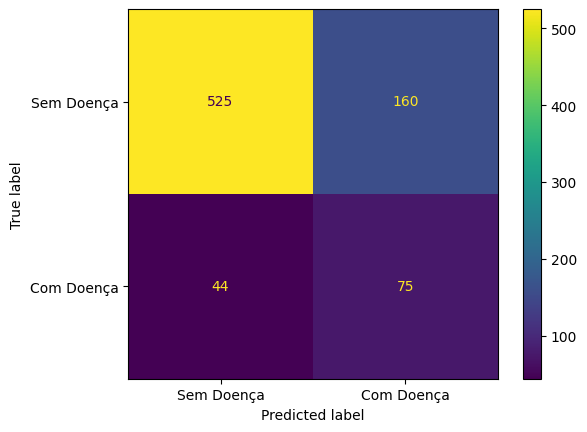

In [31]:
y_probs = clf.predict_proba(x_teste)[:, 1]

threshold = 0.18
y_pred2 = (y_probs >= threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred2)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot()

In [32]:
recall = metrics.recall_score(y_teste, y_pred2)
f1_score = metrics.f1_score(y_teste, y_pred2)
print(recall, f1_score)

0.6302521008403361 0.423728813559322


##### Balanceando os dados

In [33]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC

In [34]:
print(x_treino.shape, y_treino.shape)
print(y_treino.value_counts())

(3214, 15) (3214,)
TenYearCHD
0    2733
1     481
Name: count, dtype: int64


In [76]:
x_treino

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3613,1,47,2.0,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0
2661,1,40,1.0,1,20.0,0.0,0,0,0,201.0,121.5,76.5,29.38,74.0,94.0
3290,1,48,2.0,0,0.0,0.0,0,0,0,165.0,115.0,80.0,26.79,75.0,78.0
1075,0,51,2.0,0,0.0,0.0,0,1,0,206.0,146.0,77.0,23.58,87.0,90.0
3249,1,51,1.0,1,9.0,0.0,0,0,0,255.0,115.0,67.0,26.97,83.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,41,1.0,1,15.0,0.0,0,0,0,242.0,139.0,80.0,19.68,72.0,60.0
1294,0,42,1.0,0,0.0,0.0,0,0,0,249.0,101.0,70.0,21.74,94.0,60.0
860,0,51,3.0,0,0.0,0.0,0,0,0,257.0,128.0,77.0,24.94,68.0,88.0
3507,1,49,4.0,1,15.0,0.0,0,1,0,309.0,145.0,92.0,32.13,60.0,73.0


In [35]:
categorical_features = [0, 2, 3, 5, 6, 7, 8]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state = 42)
x_treino2, y_treino2 = smote_nc.fit_resample(x_treino, y_treino)

In [36]:
y_treino2.value_counts()

TenYearCHD
1    2733
0    2733
Name: count, dtype: int64

In [37]:
x_treino2['education'] = x_treino2['education'].astype(int)
x_treino2['BPMeds'] = x_treino2['BPMeds'].astype(int)

In [38]:
for coluna in x_treino2.columns:
    if x_treino2[coluna].dtype == np.float64:
        x_treino2[coluna] = x_treino2[coluna].round(2)

x_treino2

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,47,2,1,20.00,0,0,1,1,296.00,141.00,93.00,28.50,68.00,332.00
1,1,40,1,1,20.00,0,0,0,0,201.00,121.50,76.50,29.38,74.00,94.00
2,1,48,2,0,0.00,0,0,0,0,165.00,115.00,80.00,26.79,75.00,78.00
3,0,51,2,0,0.00,0,0,1,0,206.00,146.00,77.00,23.58,87.00,90.00
4,1,51,1,1,9.00,0,0,0,0,255.00,115.00,67.00,26.97,83.00,58.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,0,66,1,0,0.00,0,0,1,0,296.27,144.71,93.72,28.60,85.73,81.27
5462,0,61,1,0,0.00,0,0,1,0,289.27,246.97,128.46,32.61,90.87,88.04
5463,0,61,3,0,0.00,0,0,1,0,313.76,201.75,117.02,25.05,66.22,86.78
5464,1,61,4,0,0.00,0,0,0,0,205.74,125.13,81.85,27.83,63.41,77.13


##### Rodando o Modelo²

In [39]:
clf = LogisticRegression(max_iter=2000)
clf.fit(x_treino2, y_treino2)

c:\Users\marce\OneDrive\Documentos\Varos\DEV_Christian\ml_\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [40]:
coef = pd.DataFrame(clf.coef_[0], index = x.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.410579
age,0.061149
education,-0.457575
currentSmoker,-0.188238
cigsPerDay,0.026917
BPMeds,-1.645580
prevalentStroke,-0.796381
prevalentHyp,0.101478
diabetes,-0.778877
totChol,0.002165


In [41]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.6825832418587633 0.664179104477612


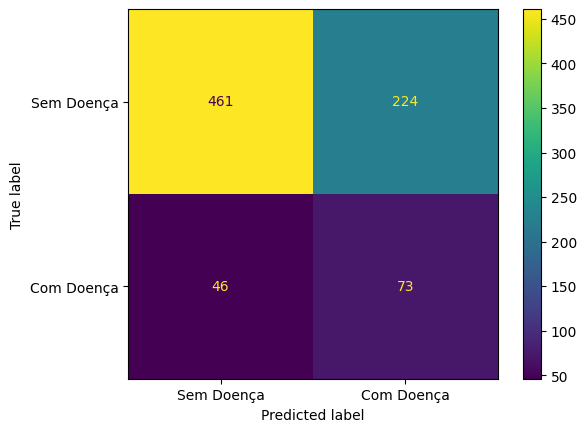

In [42]:
y_pred3 = clf.predict(x_teste)
cm = metrics.confusion_matrix(y_teste, y_pred3)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [43]:
recall = metrics.recall_score(y_teste, y_pred3)
f1_score = metrics.f1_score(y_teste, y_pred3)
print(recall, f1_score)

0.6134453781512605 0.35096153846153844


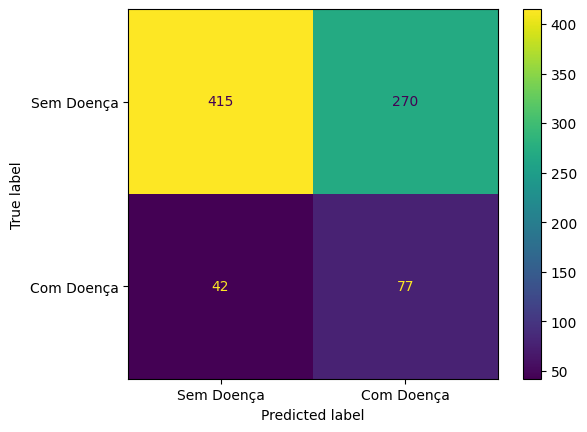

In [44]:
y_probs2 = clf.predict_proba(x_teste)[:, 1]

threshold = 0.18
threshold = 0.45
y_pred4 = (y_probs2 >= threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred4)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [45]:
recall = metrics.recall_score(y_teste, y_pred4)
f1_score = metrics.f1_score(y_teste, y_pred4)
print(recall, f1_score)

0.6470588235294118 0.33047210300429186


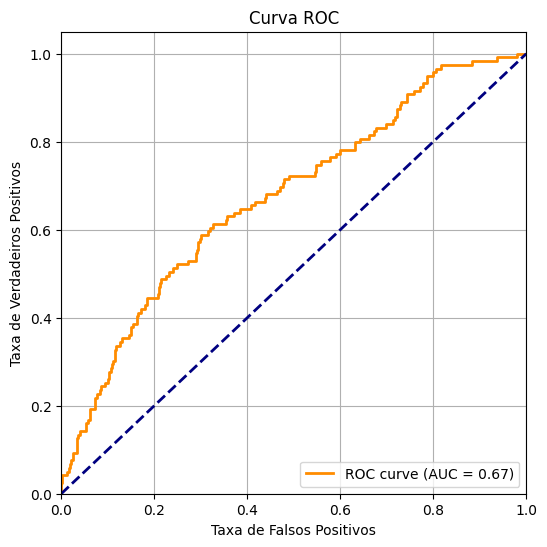

In [46]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs2)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Excluindo a coluna "education"

In [47]:
x_treino2 = x_treino2.drop(columns = 'education')
x_teste = x_teste.drop(columns = 'education')

In [48]:
clf = LogisticRegression(max_iter=2000)
clf.fit(x_treino2, y_treino2)

LogisticRegression(max_iter=2000)

In [49]:
coef = pd.DataFrame(clf.coef_[0], index = x_treino2.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.390773
age,0.066537
currentSmoker,-0.154519
cigsPerDay,0.027282
BPMeds,-1.629004
prevalentStroke,-0.708797
prevalentHyp,0.111570
diabetes,-0.743791
totChol,0.001605
sysBP,0.016110


In [50]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_teste, score_treinamento)

0.6604477611940298 0.6741675814123673


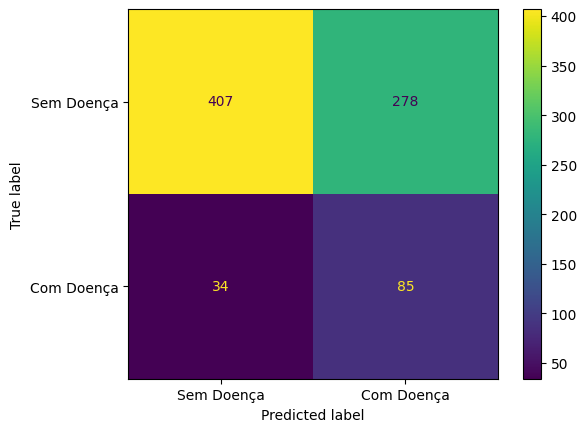

In [51]:
y_probs3 = clf.predict_proba(x_teste)[:, 1]

# threshold = 0.18 # Recall 98% + F1 27% + AUC 70%
# threshold = 0.3 # Recall 87% + F1 30% + AUC 70%
threshold = 0.45 # Recall 71.4% + F1 35.2% + AUC 70%
y_pred4 = (y_probs3 >= threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred4)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [52]:
recall = metrics.recall_score(y_teste, y_pred4)
f1_score = metrics.f1_score(y_teste, y_pred4)
print(recall, f1_score)

0.7142857142857143 0.35269709543568467


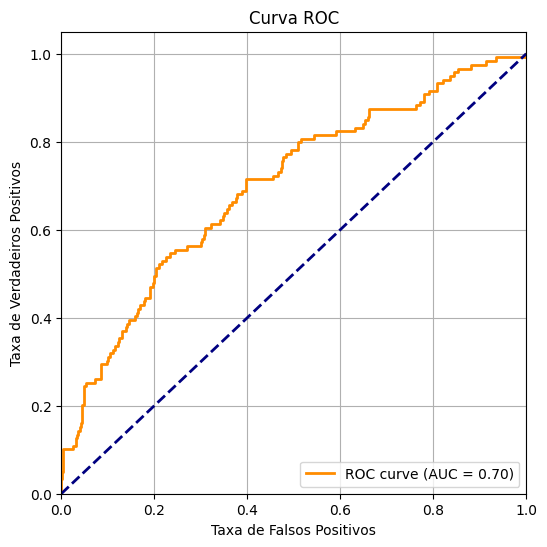

In [53]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs3)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Correlação e exclusão da coluna currentSmoker

In [54]:
x_treino2.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.008997,0.322391,0.393107,-0.056712,-0.008895,-0.043864,0.001602,-0.100074,-0.054100,0.017464,0.047145,-0.094770,-0.026160
age,-0.008997,1.000000,-0.241709,-0.193041,0.082580,0.023098,0.351099,0.089066,0.238931,0.415040,0.221913,0.135083,-0.007736,0.109757
currentSmoker,0.322391,-0.241709,1.000000,0.770890,-0.041422,-0.021819,-0.174777,-0.047207,-0.099374,-0.170396,-0.144534,-0.151686,0.074157,-0.075712
cigsPerDay,0.393107,-0.193041,0.770890,1.000000,-0.037663,-0.027898,-0.094713,-0.030326,-0.037490,-0.088120,-0.064313,-0.079234,0.105350,-0.062830
BPMeds,-0.056712,0.082580,-0.041422,-0.037663,1.000000,0.132605,0.167210,0.059986,0.053537,0.154398,0.128917,0.081074,0.010854,0.071705
prevalentStroke,-0.008895,0.023098,-0.021819,-0.027898,0.132605,1.000000,0.039610,-0.009753,0.003221,0.025968,0.027468,0.020335,-0.010092,-0.004083
prevalentHyp,-0.043864,0.351099,-0.174777,-0.094713,0.167210,0.039610,1.000000,0.079754,0.184243,0.728087,0.655444,0.289111,0.155975,0.116677
diabetes,0.001602,0.089066,-0.047207,-0.030326,0.059986,-0.009753,0.079754,1.000000,0.046911,0.068216,0.018992,0.084948,0.067782,0.722956
totChol,-0.100074,0.238931,-0.099374,-0.037490,0.053537,0.003221,0.184243,0.046911,1.000000,0.216265,0.157162,0.112012,0.096337,0.083837
sysBP,-0.054100,0.415040,-0.170396,-0.088120,0.154398,0.025968,0.728087,0.068216,0.216265,1.000000,0.825055,0.324455,0.174569,0.121924


In [55]:
x_treino2 = x_treino2.drop(columns = 'currentSmoker')
x_teste = x_teste.drop(columns = 'currentSmoker')

In [56]:
clf = LogisticRegression(max_iter=2000)
clf.fit(x_treino2, y_treino2)

LogisticRegression(max_iter=2000)

In [57]:
coef = pd.DataFrame(clf.coef_[0], index = x_treino2.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.386869
age,0.067050
cigsPerDay,0.022480
BPMeds,-1.644680
prevalentStroke,-0.706784
prevalentHyp,0.119262
diabetes,-0.735299
totChol,0.001657
sysBP,0.016104
diaBP,0.001311


In [58]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.6759970728137578 0.6616915422885572


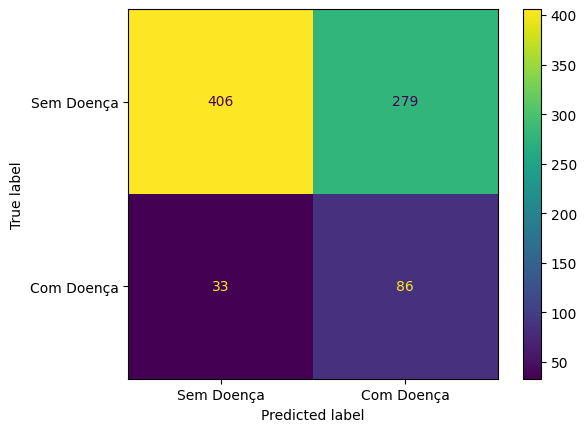

In [59]:
y_probs4 = clf.predict_proba(x_teste)[:, 1]

# threshold = 0.18 # Recall 98% + F1 25% + AUC 70%
# threshold = 0.3 # Recall 85% + F1 30% + AUC 70%
threshold = 0.45 # Recall 72.2% + F1 35.5% + AUC 70%
# threshold = 0.4 # Recall 78.9% + F1 33.9% + AUC 70%
y_pred5 = (y_probs4 >= threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred5)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [60]:
recall = metrics.recall_score(y_teste, y_pred5)
f1_score = metrics.f1_score(y_teste, y_pred5)
print(recall, f1_score)

0.7226890756302521 0.35537190082644626


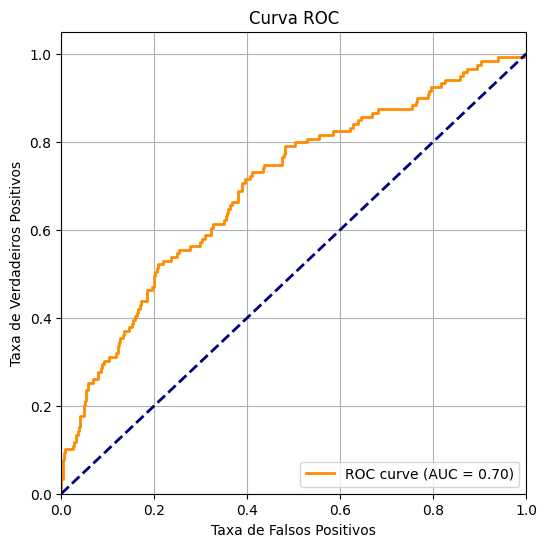

In [61]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs4)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Utilizando o algoritmo de "solver = liblinear"

In [62]:
clf = LogisticRegression(solver = 'liblinear', max_iter=2000)
clf.fit(x_treino2, y_treino2)

LogisticRegression(max_iter=2000, solver='liblinear')

In [63]:
coef = pd.DataFrame(clf.coef_[0], index = x_treino2.columns, columns = ['Coeficientes'])
coef

,Coeficientes
male,0.376123
age,0.062583
cigsPerDay,0.021511
BPMeds,-1.589862
prevalentStroke,-0.693159
prevalentHyp,0.218176
diabetes,-0.592072
totChol,0.001265
sysBP,0.015774
diaBP,-0.001957


In [64]:
score_treinamento = clf.score(x_treino2, y_treino2)
score_teste = clf.score(x_teste, y_teste)
print(score_treinamento, score_teste)

0.6741675814123673 0.667910447761194


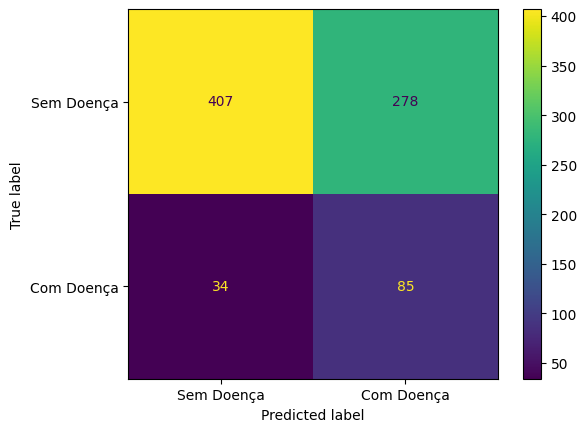

In [65]:
y_probs5 = clf.predict_proba(x_teste)[:, 1]

# threshold = 0.18 # Recall 98% + F1 25% + AUC 70%
# threshold = 0.3 # Recall 85% + F1 30% + AUC 70%
threshold = 0.45 # Recall 72.2% + F1 35.5% + AUC 70%
# threshold = 0.4 # Recall 78.9% + F1 33.9% + AUC 70%
y_pred6 = (y_probs5 > threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred6)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['Sem Doença', 'Com Doença'])
display.plot();

In [66]:
recall = metrics.recall_score(y_teste, y_pred6)
f1_score = metrics.f1_score(y_teste, y_pred6)
print(recall, f1_score)

0.7142857142857143 0.35269709543568467


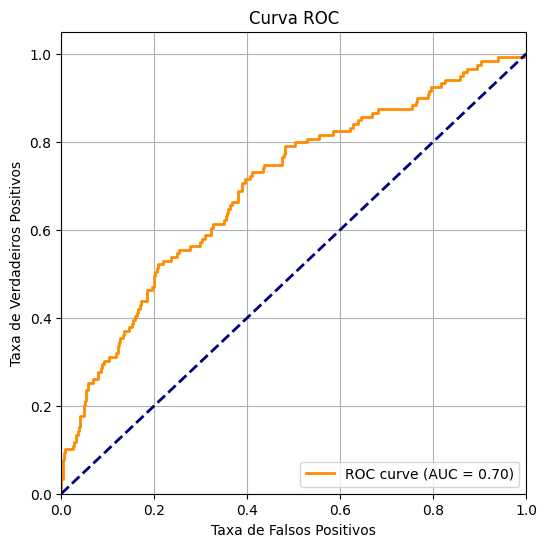

In [67]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs4)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Selecionando as melhores features

In [68]:
x_treino2

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,47,20.00,0,0,1,1,296.00,141.00,93.00,28.50,68.00,332.00
1,1,40,20.00,0,0,0,0,201.00,121.50,76.50,29.38,74.00,94.00
2,1,48,0.00,0,0,0,0,165.00,115.00,80.00,26.79,75.00,78.00
3,0,51,0.00,0,0,1,0,206.00,146.00,77.00,23.58,87.00,90.00
4,1,51,9.00,0,0,0,0,255.00,115.00,67.00,26.97,83.00,58.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,0,66,0.00,0,0,1,0,296.27,144.71,93.72,28.60,85.73,81.27
5462,0,61,0.00,0,0,1,0,289.27,246.97,128.46,32.61,90.87,88.04
5463,0,61,0.00,0,0,1,0,313.76,201.75,117.02,25.05,66.22,86.78
5464,1,61,0.00,0,0,0,0,205.74,125.13,81.85,27.83,63.41,77.13


In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find best scored 6 features
select_feature = SelectKBest(chi2, k=10).fit(x_treino2, y_treino2)

dfscores = pd.DataFrame(select_feature.scores_)
dfcolumns = pd.DataFrame(x_treino2.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top_featureScores = featureScores.nlargest(10,'Score')
print(top_featureScores)


           Specs        Score
8          sysBP  1655.138788
1            age   682.059821
7        totChol   563.428350
2     cigsPerDay   450.520364
9          diaBP   407.597892
12       glucose   360.031752
5   prevalentHyp   156.547368
0           male    41.840356
10           BMI    28.985528
3         BPMeds    13.172043


In [70]:
#Making a dataset with only the top 10 features
best_feature_names = top_featureScores['Specs']
best_feature_names
x_best_treino = x_treino2[best_feature_names].sort_index()
x_best_teste = x_teste[best_feature_names].sort_index()
# y_best_treino = y_treino[best_feature_names]
# y_best_teste = y_teste[best_feature_names]

x_best_teste

,sysBP,age,totChol,cigsPerDay,diaBP,glucose,prevalentHyp,male,BMI,BPMeds
6,138.0,63,205.0,0.0,71.0,85.0,0,0,33.11,0.0
8,141.5,52,260.0,0.0,89.0,79.0,1,1,26.36,0.0
12,142.0,46,294.0,15.0,94.0,64.0,1,1,26.31,0.0
14,114.0,39,226.0,9.0,64.0,79.2,0,0,22.35,0.0
17,112.0,46,291.0,20.0,78.0,89.0,0,0,23.38,0.0
...,...,...,...,...,...,...,...,...,...,...
3997,167.0,63,266.0,0.0,94.0,94.0,1,0,25.23,0.0
4003,149.0,56,287.0,0.0,98.0,75.0,1,1,21.68,1.0
4005,137.5,45,216.0,43.0,85.0,105.0,0,1,24.24,0.0
4015,131.0,48,248.0,20.0,72.0,86.0,0,0,22.00,0.0


In [71]:
clf = LogisticRegression(max_iter=2000, solver = 'liblinear')
clf.fit(x_best_treino, y_treino2)
coef = pd.DataFrame(clf.coef_[0], index = x_best_treino.columns, columns = ['Coeficientes'])
coef

,Coeficientes
sysBP,0.015462
age,0.062801
totChol,0.001089
cigsPerDay,0.019312
diaBP,-0.002959
glucose,0.004423
prevalentHyp,0.203631
male,0.412217
BMI,-0.003243
BPMeds,-1.607619


In [72]:
score_treinamento = clf.score(x_best_treino, y_treino2)
score_teste = clf.score(x_best_teste, y_teste)
print(score_treinamento, score_teste)

0.677277716794731 0.5970149253731343


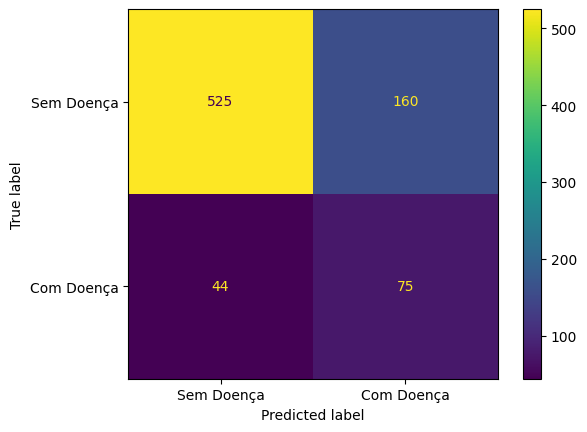

In [73]:
y_probs6 = clf.predict_proba(x_best_teste)[:, 1]

# threshold = 0.15 # Recall 67% + F1 38% + AUC 70%
threshold = 0.18 # Recall 63% + F1 42% + AUC 70%

y_pred6 = (y_probs > threshold).astype(int)

cm = metrics.confusion_matrix(y_teste, y_pred6)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Sem Doença', 'Com Doença'])
display.plot();

In [74]:
recall = metrics.recall_score(y_teste, y_pred6)
f1_score = metrics.f1_score(y_teste, y_pred6)
print(recall, f1_score)

0.6302521008403361 0.423728813559322


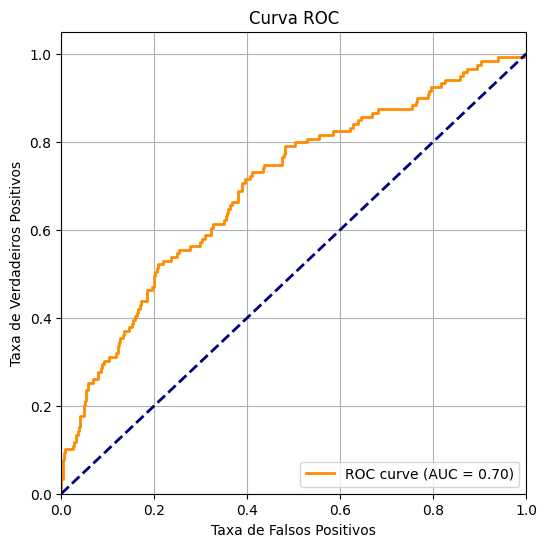

In [75]:
fpr, tpr, threshold_ = metrics.roc_curve(y_teste, y_probs4)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()